In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('/kaggle/input/dataset/train.csv',index_col = 0)
test = pd.read_csv('/kaggle/input/dataset/test.csv',index_col = 0)

In [2]:
train.head()

,Date,Open,Close,Volume,Strategy
id,,,,,
0,2015-06-01,66.208486,75.609978,298506300,Hold
1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2015-06-15,47.701942,71.140831,250670900,Buy
3,2015-06-22,54.754816,72.881344,223614300,Hold
4,2015-06-29,48.031899,66.284718,406814900,Buy


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = test.copy()

In [5]:
print(df.isnull().sum())

Date      0
Open      0
Volume    0
dtype: int64


In [6]:
df2 = train.copy()

In [7]:
print(df2.isnull().sum())

Date        0
Open        0
Close       0
Volume      0
Strategy    0
dtype: int64


In [8]:
print(df.dtypes)
print(df2.dtypes)

Date       object
Open      float64
Volume      int64
dtype: object
Date         object
Open        float64
Close       float64
Volume        int64
Strategy     object
dtype: object


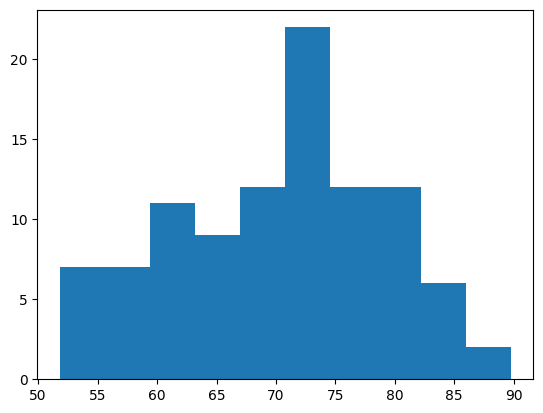

In [9]:
plt.hist(df['Open'])
plt.show()

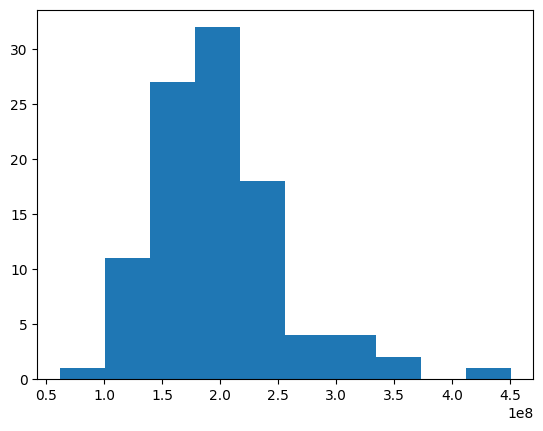

In [10]:
plt.hist(df['Volume'])
plt.show()

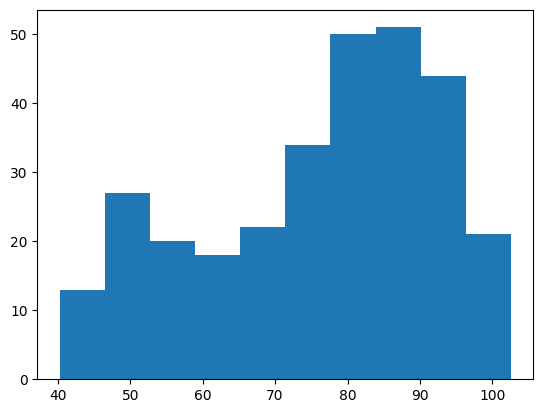

In [11]:
plt.hist(df2['Open'])
plt.show()

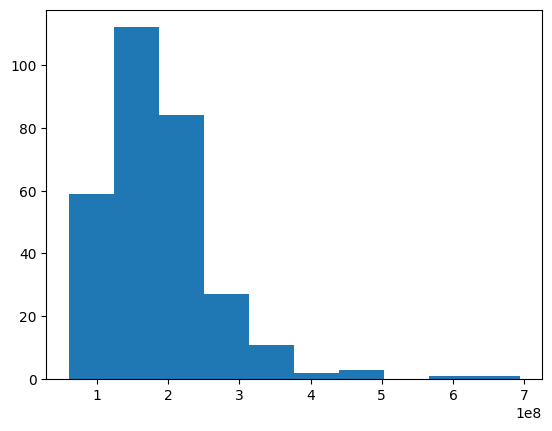

In [12]:
plt.hist(df2['Volume'])
plt.show()

In [13]:
print(df2['Open'].describe())
print(df2['Volume'].describe())
print(df2['Close'].describe())

count    300.000000
mean      75.977813
std       16.158343
min       40.269435
25%       64.872395
50%       79.805683
75%       88.342927
max      102.558322
Name: Open, dtype: float64
count    3.000000e+02
mean     1.866300e+08
std      7.952792e+07
min      5.991330e+07
25%      1.324862e+08
50%      1.715536e+08
75%      2.201842e+08
max      6.935702e+08
Name: Volume, dtype: float64
count    300.000000
mean      79.430489
std       13.878395
min       47.979353
25%       69.689227
50%       82.991900
75%       89.719145
max      103.119373
Name: Close, dtype: float64


In [14]:
print(df2['Open'].corr(df2['Close']))
print(df2['Open'].corr(df2['Volume']))
print(df2['Open'].corr(df2['Volume']))

0.9277952885883648
-0.4610101897004452
-0.4610101897004452


In [15]:
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

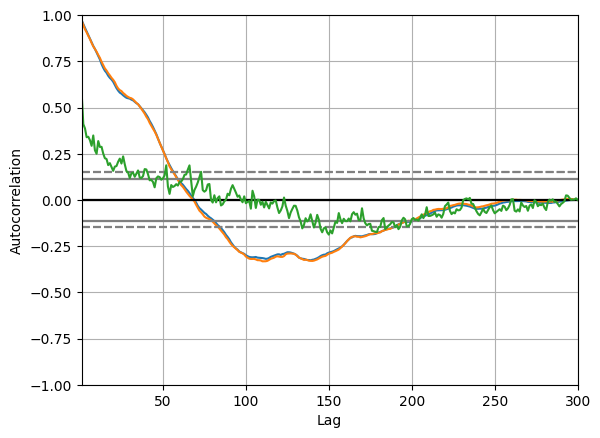

In [16]:

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2['Close'])
autocorrelation_plot(df2['Open'])
autocorrelation_plot(df2['Volume'])
plt.show()

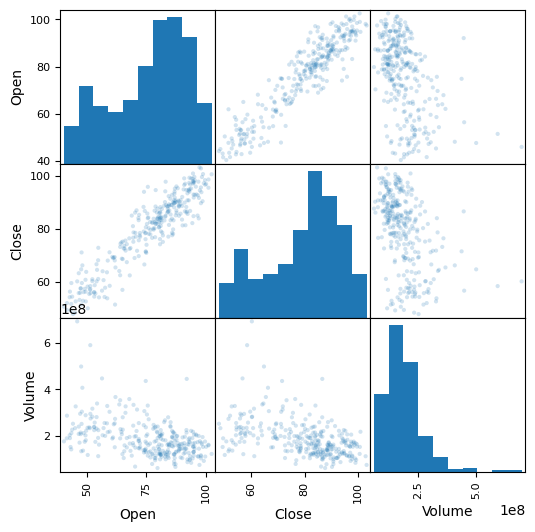

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2[['Open' , 'Close' , 'Volume']], alpha=0.2, figsize=(6, 6))
plt.show()

In [18]:
print(df2['Close'].skew())
print(df2['Close'].kurtosis())

-0.5608305379154453
-0.7079542537881989


In [19]:
print(df2['Open'].skew())
print(df2['Open'].kurtosis())

-0.5351153113061071
-0.78965396789788


In [20]:
print(df2['Volume'].skew())
print(df2['Volume'].kurtosis())

2.069399668062799
8.033388846826615


<Figure size 1200x1000 with 0 Axes>

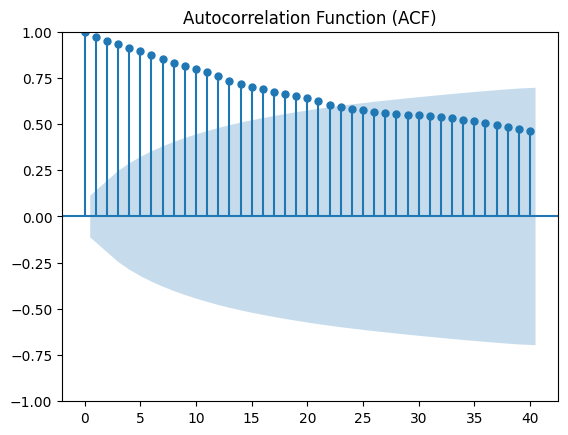

<Figure size 1200x600 with 0 Axes>

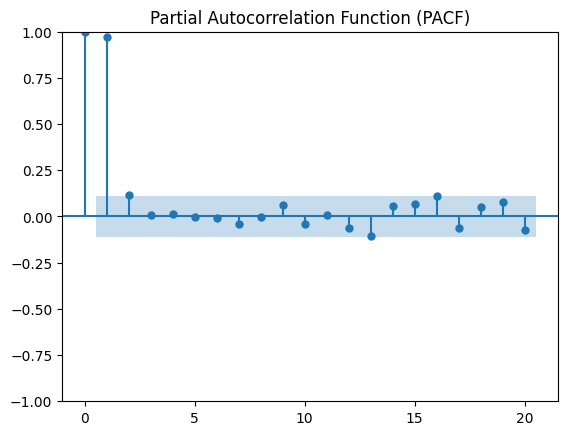

In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your time series data into a DataFrame
# Assuming 'data' is your time series data
data = pd.read_csv('/kaggle/input/dataset/train.csv')

# Ensure the data is properly formatted with a datetime index
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

# Select the numerical column you want to analyze
numerical_column = data['Close']

# Plot ACF (Autocorrelation Function)
plt.figure(figsize=(12, 10))
plot_acf(numerical_column, lags=40)  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF (Partial Autocorrelation Function)
plt.figure(figsize=(12, 6))
plot_pacf(numerical_column, lags=20)  # Adjust 'lags' as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()



<Figure size 1200x600 with 0 Axes>

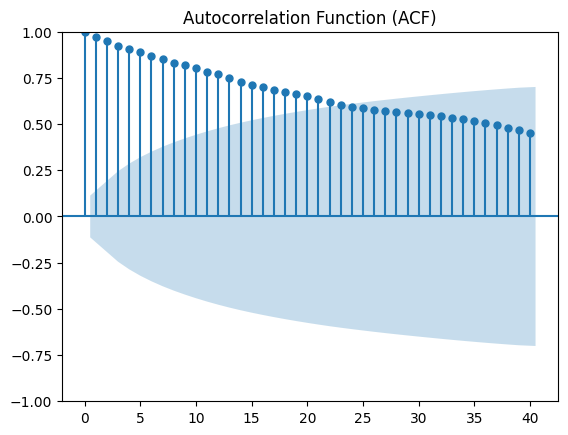

<Figure size 1200x600 with 0 Axes>

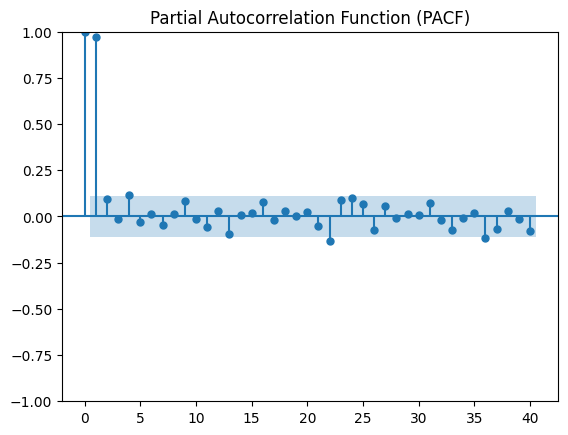

In [22]:
numerical_column = data['Open']

# Plot ACF (Autocorrelation Function)
plt.figure(figsize=(12, 6))
plot_acf(numerical_column, lags=40)  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF (Partial Autocorrelation Function)
plt.figure(figsize=(12, 6))
plot_pacf(numerical_column, lags=40)  # Adjust 'lags' as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv('/kaggle/input/dataset/train.csv')

# Ensure the data is properly formatted with a datetime index
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

# Select the numerical column you want to test
numerical_column = data['Close']

# Perform the ADF test
result = adfuller(numerical_column)

# Extract the ADF test statistic and p-value
adf_statistic = result[0]
p_value = result[1]

# Display the results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value <= 0.05:  # Common significance level of 0.05
    print('Null hypothesis (non-stationary) rejected. Data is likely stationary.')
else:
    print('Null hypothesis not rejected. Data may be non-stationary.')


ADF Statistic: -1.8080055426222836
p-value: 0.37649446979222034
Null hypothesis not rejected. Data may be non-stationary.


In [24]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv('/kaggle/input/dataset/train.csv')

# Ensure the data is properly formatted with a datetime index
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

# Select the numerical column you want to test
numerical_column = data['Volume']

# Perform the ADF test
result = adfuller(numerical_column)

# Extract the ADF test statistic and p-value
adf_statistic = result[0]
p_value = result[1]

# Display the results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value <= 0.05:  # Common significance level of 0.05
    print('Null hypothesis (non-stationary) rejected. Data is likely stationary.')
else:
    print('Null hypothesis not rejected. Data may be non-stationary.')


ADF Statistic: -3.327071678181228
p-value: 0.013710894607624674
Null hypothesis (non-stationary) rejected. Data is likely stationary.


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train_data = pd.read_csv('/kaggle/input/dataset/train.csv')
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day
train_data['Day_of_Week'] = train_data['Date'].dt.dayofweek
train_data['Year'] = train_data['Date'].dt.year
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['Open', 'Volume']
scaler = MinMaxScaler()
train_set_normalized = train_data.copy()  # Create a copy of the dataset to avoid altering the original
normalized_values = scaler.fit_transform(train_set_normalized[columns_to_normalize])
normalized_columns = [col + '_normalized' for col in columns_to_normalize]
train_data[normalized_columns] = normalized_values
num_lags = 3
for i in range(1, num_lags + 1):
    train_data[f'Open_lag_{i}'] = train_data['Open'].shift(i)
    train_data[f'Volume_lag_{i}'] = train_data['Volume'].shift(i)
for i in range(1, num_lags + 1):
    train_data[f'Open_lag_{i}'].fillna(train_data[f'Open_lag_{i}'].mean(),inplace = True)
    train_data[f'Volume_lag_{i}'].fillna(train_data[f'Open_lag_{i}'].mean(),inplace = True)



window_size = 5
rolling_cols = ['Open', 'Volume']
train_data['Open_rolling_mean'] = train_set_normalized['Open'].rolling(window=window_size).mean()
train_data['Open_rolling_std'] = train_set_normalized['Open'].rolling(window=window_size).std()
train_data['Volume_rolling_mean'] = train_set_normalized['Volume'].rolling(window=window_size).mean()
train_data['Volume_rolling_std'] = train_set_normalized['Volume'].rolling(window=window_size).std()
train_data['Open_rolling_mean'].fillna(train_data['Open_rolling_mean'].mean(), inplace=True)
train_data['Open_rolling_std'].fillna(train_data['Open_rolling_std'].mean(), inplace=True)
train_data['Volume_rolling_mean'].fillna(train_data['Volume_rolling_mean'].mean(), inplace=True)
train_data['Volume_rolling_std'].fillna(train_data['Volume_rolling_std'].mean(), inplace=True)
train_data['Open_Volume_interaction'] = train_data['Open'] * train_data['Volume']
total_samples = len(train_data)
train_size = int(total_samples * 0.8)
train_set = train_data.iloc[:train_size]
test_set = train_data.iloc[train_size:]
p = 0
d = 1
q = 1

exog_vars = ['Open', 'Volume', 'Open_Volume_interaction', 'Open_rolling_mean', 'Open_rolling_std', 'Volume_rolling_mean', 'Volume_rolling_std', 'Open_lag_1', 'Volume_lag_1', 'Open_lag_2', 'Volume_lag_2', 'Open_lag_3', 'Volume_lag_3']  # List of exogenous variables

# Create and fit the ARIMAX model
arimax_model = SARIMAX(train_data['Close'], order=(p, d, q), exog=train_data[exog_vars])
arimax_model_fit = arimax_model.fit()

# Assuming 'test_set' is the DataFrame you want to check

# Forecast using the fitted model on the test data
forecast = arimax_model_fit.forecast(steps=len(test_set), exog=test_set[exog_vars]).tolist()

# Calculate Mean Squared Error (MSE)
test_actual = test_set['Close']
smape = np.mean(np.abs(forecast - test_actual) / (np.abs(forecast) + np.abs(test_actual)))
print(smape)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07949D+00    |proj g|=  2.70728D+13


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      1     21      1     0     0   2.707D+13   2.079D+00
  F =   2.0794925558626347     

ABNORMAL_TERMINATION_IN_LNSRCH                              
0.008443959249218622



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

# Read the test data
test_data = pd.read_csv('/kaggle/input/dataset/test.csv')

# Perform similar preprocessing as done for the training data
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data['Month'] = test_data['Date'].dt.month
test_data['Day'] = test_data['Date'].dt.day
test_data['Day_of_Week'] = test_data['Date'].dt.dayofweek
test_data['Year'] = test_data['Date'].dt.year

# Normalize columns
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(test_data[['Open', 'Volume']])
normalized_columns = ['Open_normalized', 'Volume_normalized']
test_data[normalized_columns] = normalized_values

# Lag features
num_lags = 3
for i in range(1, num_lags + 1):
    test_data[f'Open_lag_{i}'] = test_data['Open'].shift(i)
    test_data[f'Volume_lag_{i}'] = test_data['Volume'].shift(i)

for i in range(1, num_lags + 1):
    test_data[f'Open_lag_{i}'].fillna(test_data[f'Open_lag_{i}'].mean(), inplace=True)
    test_data[f'Volume_lag_{i}'].fillna(test_data[f'Open_lag_{i}'].mean(), inplace=True)

# Rolling statistics
window_size = 5
test_data['Open_rolling_mean'] = test_data['Open'].rolling(window=window_size).mean()
test_data['Open_rolling_std'] = test_data['Open'].rolling(window=window_size).std()
test_data['Volume_rolling_mean'] = test_data['Volume'].rolling(window=window_size).mean()
test_data['Volume_rolling_std'] = test_data['Volume'].rolling(window=window_size).std()

test_data['Open_rolling_mean'].fillna(test_data['Open_rolling_mean'].mean(), inplace=True)
test_data['Open_rolling_std'].fillna(test_data['Open_rolling_std'].mean(), inplace=True)
test_data['Volume_rolling_mean'].fillna(test_data['Volume_rolling_mean'].mean(), inplace=True)
test_data['Volume_rolling_std'].fillna(test_data['Volume_rolling_std'].mean(), inplace=True)

# Interaction feature
test_data['Open_Volume_interaction'] = test_data['Open'] * test_data['Volume']

# Features used for prediction
exog_vars = ['Open', 'Volume', 'Open_Volume_interaction', 'Open_rolling_mean', 'Open_rolling_std', 'Volume_rolling_mean', 'Volume_rolling_std', 'Open_lag_1', 'Volume_lag_1', 'Open_lag_2', 'Volume_lag_2', 'Open_lag_3', 'Volume_lag_3']

forecast = arimax_model_fit.forecast(steps=len(test_data), exog=test_data[exog_vars])

results = pd.DataFrame({
    'id': test_data['id'],
    'date': test_data['Date'],
    'Close': forecast.tolist()
})
close_values = forecast.tolist()


# Save the updated 'test.csv' with predicted 'Close' values to a new file

In [27]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your train and test datasets
train_data = pd.read_csv('/kaggle/input/dataset/train.csv')
test_data = pd.read_csv('/kaggle/input/dataset/test.csv')
train_data['Strategy_Encoded'] = train_data['Strategy'].map({'Buy': 0, 'Sell': 1, 'Hold': 2})

# Calculate the moving average (you can adjust the window size as needed)
window_size = 3
train_data['Moving_Avg'] = train_data['Close'].rolling(window=window_size).mean()
# Function to calculate RSI
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    data['SMA'] = data['Close'].rolling(window=window).mean()
    data['STD'] = data['Close'].rolling(window=window).std()
    data['UpperBand'] = data['SMA'] + (data['STD'] * num_std_dev)
    data['LowerBand'] = data['SMA'] - (data['STD'] * num_std_dev)
    return data

def calculate_obv(data):
    data['Daily_Return'] = data['Close'].diff()
    data['Direction'] = (data['Daily_Return'] >= 0).astype(int)
    data['Volume_Signed'] = data['Volume'] * data['Direction']
    data['OBV'] = data['Volume_Signed'].cumsum()
    data.drop(['Daily_Return', 'Direction', 'Volume_Signed'], axis=1, inplace=True)  # Drop intermediate columns
    return data


train_data = calculate_obv(train_data)

train_data = calculate_bollinger_bands(train_data)



def calculate_rsi(data, window_length):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

window_length = 10
train_data['RSI'] = calculate_rsi(train_data, window_length)

def calculate_vwap(data):
    data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['TPV'] = data['TP'] * data['Volume']
    data['CumulativeTPV'] = data['TPV'].cumsum()
    data['CumulativeVolume'] = data['Volume'].cumsum()
    data['VWAP'] = data['CumulativeTPV'] / data['CumulativeVolume']
    return data['VWAP']



train_data['High'] = train_data['Close'].rolling(window=window_size).max()
train_data['Low'] = train_data['Close'].rolling(window=window_size).min()
train_data['VWAP'] = calculate_vwap(train_data)
train_data['EMA_12'] = train_data['Close'].ewm(span=12, adjust=False).mean()
train_data['EMA_26'] = train_data['Close'].ewm(span=26, adjust=False).mean()
train_data['MACD'] = train_data['EMA_12'] - train_data['EMA_26']
# Define features and target
features = ['Open', 'Volume', 'Close', 'Moving_Avg','RSI','VWAP','MACD','UpperBand','LowerBand','OBV']
target = ['Strategy_Encoded']

X = train_data[features]
y = train_data[target]

# Split the train data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test).tolist()
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test subset: {accuracy}")

# Calculate RSI for test_data
test_data['Close'] = close_values
test_data['Moving_Avg'] = test_data['Close'].rolling(window=window_size).mean()
test_data['RSI'] = calculate_rsi(test_data, window_length)
test_data['High'] = train_data['Close'].rolling(window=window_size).max()
test_data['Low'] = train_data['Close'].rolling(window=window_size).min()
test_data['VWAP'] = calculate_vwap(test_data)
test_data['EMA_12'] = test_data['Close'].ewm(span=12, adjust=False).mean()
test_data['EMA_26'] = test_data['Close'].ewm(span=26, adjust=False).mean()
test_data['MACD'] = test_data['EMA_12'] - test_data['EMA_26']
test_data = calculate_bollinger_bands(test_data)
test_data = calculate_obv(test_data)
X_test_data = test_data[features]
predicted_strategies = model.predict(X_test_data).tolist()

# Mapping function to convert integer predictions to string labels
def map_to_string(prediction):
    if prediction == 0:
        return 'Buy'
    elif prediction == 1:
        return 'Sell'
    elif prediction == 2:
        return 'Hold'
    else:
        return 'Unknown'  # Handle other cases if needed

# Applying the mapping function to convert integer predictions to string labels
predicted_labels = [map_to_string(prediction) for prediction in predicted_strategies]

# Adding predictions to the test dataset
test_data['Strategy'] = predicted_labels
final = test_data[['id', 'Date', 'Close', 'Strategy']]
final.to_csv('prediction.csv', index=False)


Accuracy on the test subset: 0.85


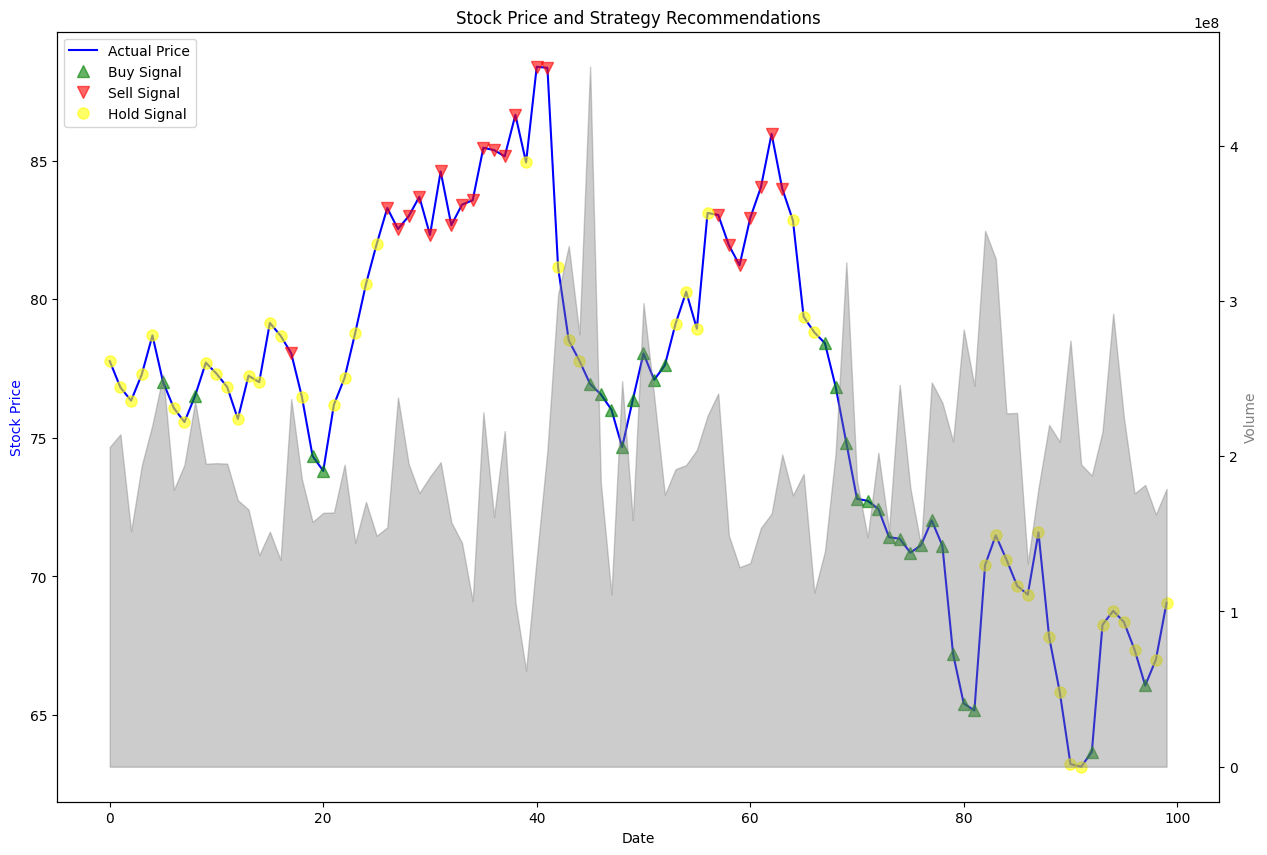

In [28]:
import matplotlib.pyplot as plt
test_df = test_data
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot the stock price and strategy signals on the primary y-axis
ax1.plot(test_df['Close'], label='Actual Price', color='blue')
# ax1.plot(test_df['Open'], label = 'Open', color = 'green')
ax1.plot(test_df['Close'].where(test_df['Strategy'] == 'Buy'), marker='^', markersize=8, color='green', label='Buy Signal', linestyle='', alpha=0.6)
ax1.plot(test_df['Close'].where(test_df['Strategy'] == 'Sell'), marker='v', markersize=8, color='red', label='Sell Signal', linestyle='', alpha=0.6)
ax1.plot(test_df['Close'].where(test_df['Strategy'] == 'Hold'), marker='o', markersize=8, color='yellow', label='Hold Signal', linestyle='', alpha=0.6)
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='blue')
ax1.legend(loc='upper left')

# Create a secondary y-axis for volume
ax2 = ax1.twinx()
ax2.fill_between(test_df.index, 0, test_df['Volume'], color='gray', alpha=0.4, label='Volume')
ax2.set_ylabel('Volume', color='gray')
# ax2.legend(loc='upper right')

plt.title('Stock Price and Strategy Recommendations')
plt.show()